# Week 4. Case 2
Metropolia   
Matias Säilä   
Last edited 25.2.2018

# Objectives
The aim of this assignment is to learn to use convolutional neural networks to classify medical
images.


## 2.Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras import models

%matplotlib inline

Using TensorFlow backend.


## Building network

In [2]:


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [3]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## Data preprocessing

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = "dataset2\\train"
validation_dir = "dataset2\\validation"

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=15,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=15,
        class_mode='binary')

Found 1237 images belonging to 2 classes.
Found 413 images belonging to 2 classes.


In [5]:
# testin testing
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (15, 150, 150, 3)
labels batch shape: (15,)


In [6]:
labels_batch

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,
        0.,  0.], dtype=float32)

## Modeling

In [7]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=15,
      verbose = 1,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=15)

Epoch 1/10
15/15 [==============================] - 79s 5s/step - loss: 0.6128 - acc: 0.6444 - val_loss: 0.5861 - val_acc: 0.7200
Epoch 2/10
15/15 [==============================] - 61s 4s/step - loss: 0.5365 - acc: 0.7496 - val_loss: 0.5421 - val_acc: 0.7064
Epoch 3/10
15/15 [==============================] - 65s 4s/step - loss: 0.5645 - acc: 0.7067 - val_loss: 0.5225 - val_acc: 0.7200
Epoch 4/10
15/15 [==============================] - 63s 4s/step - loss: 0.5585 - acc: 0.6933 - val_loss: 0.5115 - val_acc: 0.7110
Epoch 5/10
15/15 [==============================] - 62s 4s/step - loss: 0.5580 - acc: 0.7111 - val_loss: 0.6200 - val_acc: 0.6800
Epoch 6/10
15/15 [==============================] - 66s 4s/step - loss: 0.5298 - acc: 0.7378 - val_loss: 0.5147 - val_acc: 0.7202
Epoch 7/10
15/15 [==============================] - 59s 4s/step - loss: 0.5212 - acc: 0.7455 - val_loss: 0.5050 - val_acc: 0.7467
Epoch 8/10
15/15 [==============================] - 63s 4s/step - loss: 0.5483 - acc: 0.73

In [9]:

model.save('ccase_2_run_1.h5')

## Results

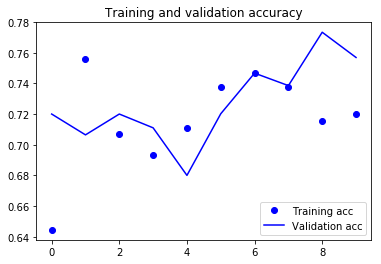

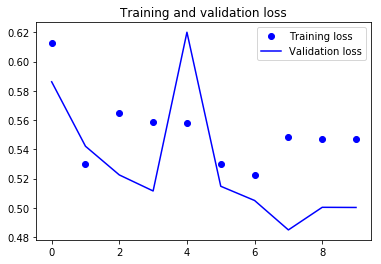

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Results
Couldnt get the results very high. Wouldnt trust these results.. Accuracy is a bit too low.